In [11]:
import yfinance as yf
import os
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
bnb_ticker = yf.Ticker("BNB-USD")
csv_file = "bnb.csv"

# Check if the CSV file exists and delete it if it does
if os.path.exists(csv_file):
    os.remove(csv_file)

# Fetch the historical data for Binance Coin
bnb = bnb_ticker.history(period="max")
bnb.to_csv(csv_file)

# Load the data from the CSV file into a DataFrame
bnb = pd.read_csv(csv_file, index_col=0)
bnb

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,2.053140,2.174230,1.893940,1.990770,19192200,0.0,0.0
2017-11-10 00:00:00+00:00,2.007730,2.069470,1.644780,1.796840,11155000,0.0,0.0
2017-11-11 00:00:00+00:00,1.786280,1.917750,1.614290,1.670470,8178150,0.0,0.0
2017-11-12 00:00:00+00:00,1.668890,1.672800,1.462560,1.519690,15298700,0.0,0.0
2017-11-13 00:00:00+00:00,1.526010,1.735020,1.517600,1.686620,12238800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-14 00:00:00+00:00,599.478699,611.628723,590.496338,603.180542,1848914113,0.0,0.0
2024-06-15 00:00:00+00:00,603.114197,609.050476,601.585938,607.802917,1471028668,0.0,0.0
2024-06-16 00:00:00+00:00,607.808472,611.197510,601.476929,610.054016,1428836675,0.0,0.0


<Axes: xlabel='Date'>

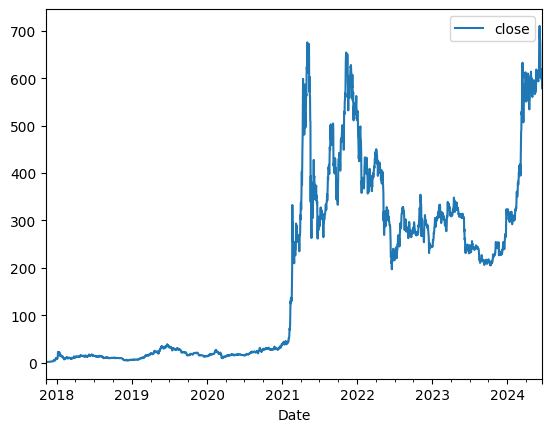

In [13]:
# Convert index to datetime
bnb.index = pd.to_datetime(bnb.index)

# Remove unnecessary columns
del bnb["Dividends"]
del bnb["Stock Splits"]

# Convert column names to lowercase
bnb.columns = [c.lower() for c in bnb.columns]

# Plot the closing price
bnb.plot.line(y="close", use_index=True)

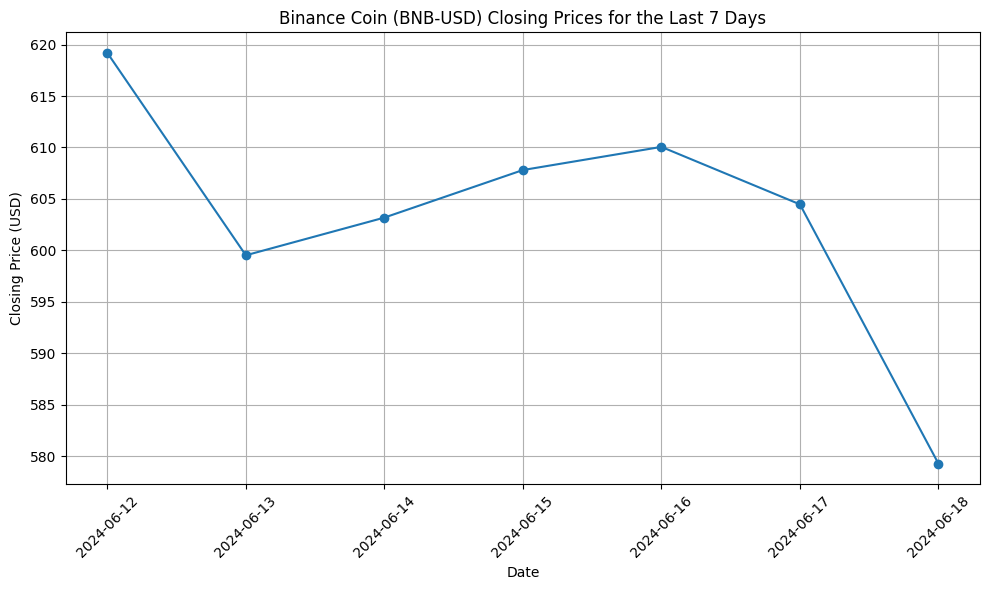

In [14]:
# Filter the data for the last seven days
last_seven_days_bnb = bnb[-7:]

# Plot the closing price for the last seven days
plt.figure(figsize=(10, 6))
plt.plot(last_seven_days_bnb.index, last_seven_days_bnb['close'], marker='o')
plt.title('Binance Coin (BNB-USD) Closing Prices for the Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
wiki = pd.read_csv("binance_sentiment.csv", index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2018-05-27,3.533333,-0.022832,0.474136
2018-05-28,3.433333,-0.060801,0.499136
2018-05-30,3.466667,-0.060816,0.499136
2018-06-02,3.466667,-0.060869,0.499136
2018-06-10,3.533333,-0.000630,0.465802
...,...,...,...
2024-05-15,2.100000,-0.133190,0.531966
2024-05-19,2.133333,-0.100380,0.515299
2024-05-24,2.100000,-0.099293,0.515299
2024-05-31,2.166667,-0.056446,0.493077


In [16]:
# Assuming 'btc' dataframe has a timezone-aware datetime index
# Localize timezone for 'wiki' dataframe if it's tz-naive
if wiki.index.tz is None:
    wiki.index = wiki.index.tz_localize('UTC')

# Merge the dataframes
bnb = bnb.merge(wiki, left_index=True, right_index=True)

# Continue with the rest of your code
bnb["tomorrow"] = bnb["close"].shift(-1)
bnb["target"] = (bnb["tomorrow"] > bnb["close"]).astype(int)
bnb["target"].value_counts()


target
1    152
0    143
Name: count, dtype: int64

In [17]:
bnb

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2018-05-27 00:00:00+00:00,12.785700,12.792300,12.329100,12.605800,36691600,3.533333,-0.022832,0.474136,11.894300,0
2018-05-28 00:00:00+00:00,12.599600,12.752800,11.703100,11.894300,33398400,3.433333,-0.060801,0.499136,12.570900,1
2018-05-30 00:00:00+00:00,12.608400,12.796900,12.273900,12.570900,43146300,3.466667,-0.060816,0.499136,14.679700,1
2018-06-02 00:00:00+00:00,14.319200,14.846000,14.008700,14.679700,87983000,3.466667,-0.060869,0.499136,14.184200,0
2018-06-10 00:00:00+00:00,15.928600,15.928600,13.592300,14.184200,79288200,3.533333,-0.000630,0.465802,14.895300,1
...,...,...,...,...,...,...,...,...,...,...
2024-05-15 00:00:00+00:00,566.707031,587.421509,561.127258,582.074341,1895100260,2.100000,-0.133190,0.531966,574.631653,0
2024-05-19 00:00:00+00:00,580.481567,581.876709,572.369629,574.631653,1298887094,2.133333,-0.100380,0.515299,600.225891,1
2024-05-24 00:00:00+00:00,598.670837,604.314880,588.893982,600.225891,1778282198,2.100000,-0.099293,0.515299,593.522339,0
2024-05-31 00:00:00+00:00,595.026794,598.423645,589.774841,593.522339,1590349553,2.166667,-0.056446,0.493077,683.360962,1


In [18]:
bnb.to_csv('bnbSentimet.csv')